<div style="
    background-color: black; 
    text-align: center; 
    padding: 20px 0;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 24px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    A/B TESTING PROJECT — LANDING PAGE CONVERSION ANALYSIS
  </h1>
</div>

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">  <!-- Added padding-left:20px -->
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Import Libraries
  </h1>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Load Data
  </h1>
</div>

In [3]:
df = pd.read_csv("ab_data.csv")
countries = pd.read_csv("countries.csv")

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Convert Timestamp to Datetime
  </h1>
</div>

#### Format is DD-MM-YYYY HH:MM

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Merge Countries Data
  </h1>
</div>

In [5]:
merged_df = df.merge(countries, on='user_id', how='left')

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Remove Invalid Rows
  </h1>
</div>

#### A valid A/B test must match:
#### control → old_page
####  treatment → new_page

In [6]:
merged_df = merged_df[~((merged_df['group']=='control') & (merged_df['landing_page']=='new_page'))]
merged_df = merged_df[~((merged_df['group']=='treatment') & (merged_df['landing_page']=='old_page'))]

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Check Group Conversion Counts
  </h1>
</div>

In [7]:
merged_df.groupby(['group','converted']).size()

group      converted
control    0            127785
           1             17489
treatment  0            128047
           1             17264
dtype: int64

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Two-Proportion Z-Test
  </h1>
</div>

In [12]:
control = merged_df[merged_df['group']=='control']
treatment = merged_df[merged_df['group']=='treatment']

control_rate = control['converted'].mean()
treatment_rate = treatment['converted'].mean()

print("Control Rate:", control_rate)
print("Treatment Rate:", p_value)

Control Rate: 0.1203863045004612
Treatment Rate: 0.18965258971881804


<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Calculate Conversion Rates
  </h1>
</div>

In [13]:
convert_counts = [treatment['converted'].sum(),control['converted'].sum()]

total_counts = [treatment['converted'].count(),control['converted'].count()]

z_stat, p_value = proportions_ztest(convert_counts, total_counts)
print("Z-Stat:", z_stat)
print("P-Value:", p_value)

Z-Stat: -1.3116075339133115
P-Value: 0.18965258971881804


<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Calculate Conversion Rates (Old vs New Page)
  </h1>
</div>

In [9]:
old_conversion = merged_df[merged_df['group'] == 'control']['converted'].mean()

new_conversion = merged_df[merged_df['group'] == 'treatment']['converted'].mean()

print("Conversion Rate — Old Page:", old_conversion)
print("Conversion Rate — New Page:", new_conversion)

Conversion Rate — Old Page: 0.1203863045004612
Conversion Rate — New Page: 0.11880724790277405


<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    One-Sided Test Significance
  </h1>
</div>

#### We check if new page > old page

In [57]:
p_val_one_sided = p_value / 2  
print("P-value:", p_val_one_sided)

P-value: 0.09482629485940902


#### Calculate critical Z value for 95% confidence:

In [59]:
z_critical = norm.ppf(1 - 0.05)
print("Z-CriticalValue:", z_critical)

Z-CriticalValue: 1.6448536269514722


#### Interpretation:

In [60]:
print("Z-score:", z_stat)
print("P-value (one-sided):", p_val_one_sided)

if (z_stat > z_critical) and (p_val_one_sided < 0.05):
    print("Reject Null → New page performs better.")
else:
    print("Fail to Reject Null → No significant improvement.")

Z-score: -1.3116075339133115
P-value (one-sided): 0.09482629485940902
Fail to Reject Null → No significant improvement.


<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Visualizations
  </h1>
</div>

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Conversion Rate Bar Chart
  </h1>
</div>

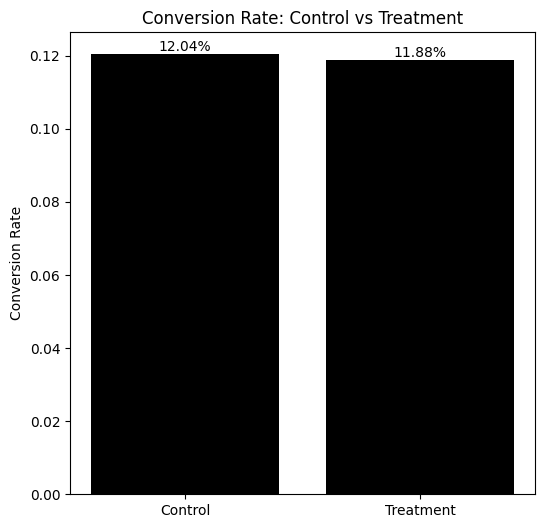

In [67]:
rates = [control_rate, treatment_rate]
labels = ['Control', 'Treatment']

plt.figure(figsize=(6,6))
bars = plt.bar(['Control', 'Treatment'], [control_rate, treatment_rate], color='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2%}', ha='center', va='bottom')

plt.title("Conversion Rate: Control vs Treatment")
plt.ylabel("Conversion Rate")
plt.show()

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Conversion Over Time Chart (Daily)
  </h1>
</div>

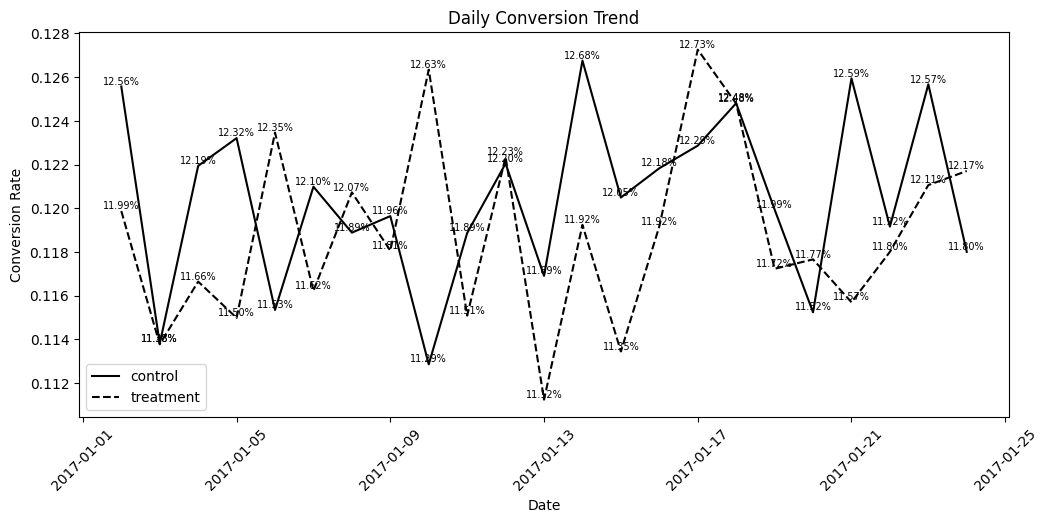

In [83]:
merged_df['date'] = merged_df['timestamp'].dt.date

daily_conv = merged_df.groupby(['date','group'])['converted'].mean().reset_index()

plt.figure(figsize=(12,5))

for grp in daily_conv['group'].unique():
    grp_data = daily_conv[daily_conv['group']==grp]
    plt.plot(grp_data['date'], grp_data['converted'], color='black', linestyle='-' if grp=='control' else '--', label=grp)

    for x, y in zip(grp_data['date'], grp_data['converted']):
        plt.text(x, y, f'{y:.2%}', fontsize=7, ha='center', va='bottom')

plt.legend()
plt.title("Daily Conversion Trend")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Country-wise Conversion Bar Chart
  </h1>
</div>

<Figure size 1000x500 with 0 Axes>

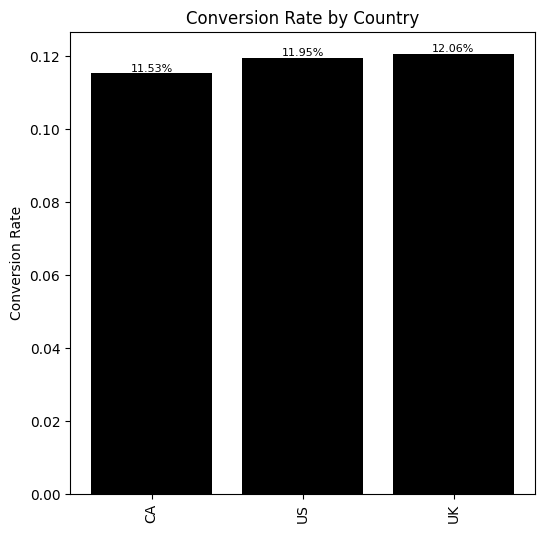

In [75]:
country_conv = merged_df.groupby('country')['converted'].mean().sort_values()

plt.figure(figsize=(6,6))
bars = plt.bar(country_conv.index, country_conv.values, color='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2%}', ha='center', va='bottom', fontsize=8)

plt.title("Conversion Rate by Country")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Traffic Distribution Chart
  </h1>
</div>

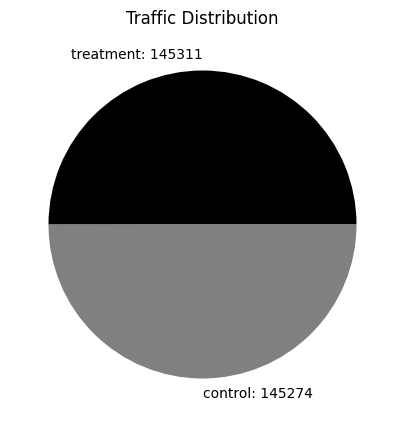

In [78]:
group_counts = merged_df['group'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(group_counts, labels=[f'{idx}: {val}' for idx, val in zip(group_counts.index, group_counts.values)], colors=['black', 'grey'])
plt.title("Traffic Distribution")
plt.show()

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Histogram of Timestamp Usage Chart
  </h1>
</div>

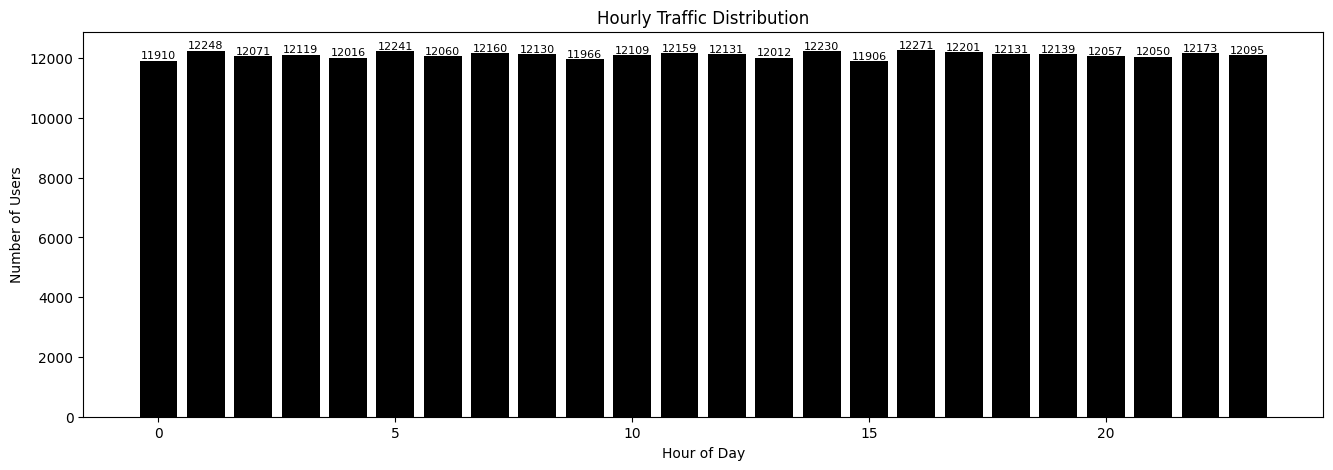

In [81]:
hourly_counts = merged_df['timestamp'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(16,5))
bars = plt.bar(hourly_counts.index, hourly_counts.values, color='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=8)

plt.title("Hourly Traffic Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Users")
plt.show()

<div style="
    background-color: black; 
    text-align: left; 
    padding: 12px 0 12px 20px;">
  <h1 style="
      color: white; 
      font-family: Arial, sans-serif; 
      font-size: 12px; 
      font-weight: bold;
      text-transform: uppercase;
      letter-spacing: 2px;">
    Conversion Heatmap Chart (Country vs Group) 
  </h1>
</div>

Text(0.5, 1.0, 'Conversion Rate Heatmap by Country & Group')

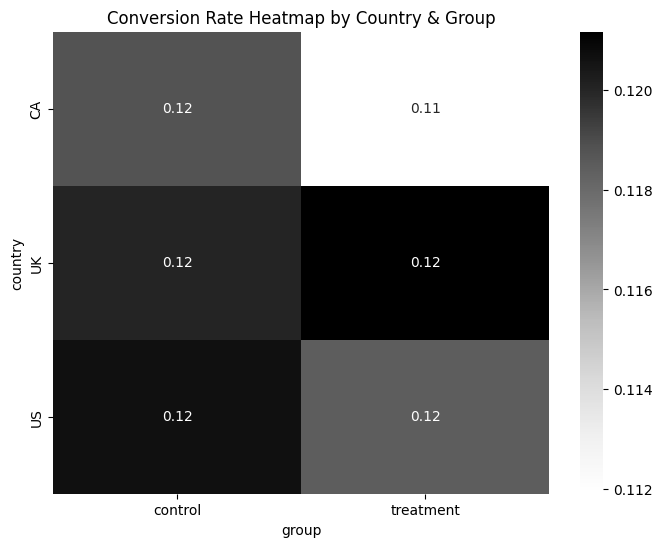

In [47]:
heat_df = merged_df.pivot_table(
    index='country',
    columns='group',
    values='converted',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(heat_df, annot=True, cmap='Greys')
plt.title("Conversion Rate Heatmap by Country & Group")